In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier


import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=FutureWarning)

df = pd.read_csv("../df_cleaned.csv")


y = df["BRCAstatesNew"]
X = df.drop(["BRCAstatesNew"], axis =1)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


In [6]:
!pip install catboost

In [8]:
from catboost import CatBoostClassifier

In [10]:
catb_model = CatBoostClassifier().fit(X_train, y_train, verbose = False)

In [12]:
y_pred = catb_model.predict(X_test)

In [14]:
accuracy_score(y_test, y_pred)

1.0

In [ ]:
#tuning

In [16]:
catb = CatBoostClassifier()

In [18]:
catb_params = {"iterations": [100,500],
               "learning_rate": [0.01, 0.1],
               "depth": [4,8]}

In [20]:
catb_cv_model = GridSearchCV(catb, catb_params, n_jobs=-1).fit(X_train, y_train)

C:\Users\acer\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


0:	learn: 1.4341892	total: 38.3ms	remaining: 3.79s
1:	learn: 1.1731409	total: 76.7ms	remaining: 3.76s
2:	learn: 0.9957901	total: 117ms	remaining: 3.79s
3:	learn: 0.8520169	total: 160ms	remaining: 3.85s
4:	learn: 0.7460226	total: 199ms	remaining: 3.79s
5:	learn: 0.6527086	total: 243ms	remaining: 3.8s
6:	learn: 0.5771133	total: 285ms	remaining: 3.79s
7:	learn: 0.5093634	total: 327ms	remaining: 3.76s
8:	learn: 0.4554925	total: 367ms	remaining: 3.71s
9:	learn: 0.4070857	total: 407ms	remaining: 3.66s
10:	learn: 0.3638837	total: 444ms	remaining: 3.6s
11:	learn: 0.3249048	total: 458ms	remaining: 3.36s
12:	learn: 0.2920385	total: 497ms	remaining: 3.33s
13:	learn: 0.2630651	total: 534ms	remaining: 3.28s
14:	learn: 0.2372707	total: 572ms	remaining: 3.24s
15:	learn: 0.2146019	total: 605ms	remaining: 3.18s
16:	learn: 0.1958251	total: 642ms	remaining: 3.14s
17:	learn: 0.1777140	total: 682ms	remaining: 3.11s
18:	learn: 0.1612204	total: 719ms	remaining: 3.06s
19:	learn: 0.1461168	total: 734ms	remaini

In [22]:
catb_cv_model.best_params_

{'depth': 8, 'iterations': 100, 'learning_rate': 0.1}

In [24]:
catb_tuned = CatBoostClassifier(iterations = 100, learning_rate = 0.1, depth= 8).fit(X_train, y_train)

0:	learn: 1.4341892	total: 49.5ms	remaining: 4.9s
1:	learn: 1.1731409	total: 88.6ms	remaining: 4.34s
2:	learn: 0.9957901	total: 124ms	remaining: 4.01s
3:	learn: 0.8520169	total: 162ms	remaining: 3.88s
4:	learn: 0.7460226	total: 197ms	remaining: 3.74s
5:	learn: 0.6527086	total: 231ms	remaining: 3.62s
6:	learn: 0.5771133	total: 265ms	remaining: 3.52s
7:	learn: 0.5093634	total: 300ms	remaining: 3.45s
8:	learn: 0.4554925	total: 334ms	remaining: 3.37s
9:	learn: 0.4070857	total: 366ms	remaining: 3.29s
10:	learn: 0.3638837	total: 398ms	remaining: 3.22s
11:	learn: 0.3249048	total: 410ms	remaining: 3.01s
12:	learn: 0.2920385	total: 444ms	remaining: 2.97s
13:	learn: 0.2630651	total: 478ms	remaining: 2.94s
14:	learn: 0.2372707	total: 512ms	remaining: 2.9s
15:	learn: 0.2146019	total: 544ms	remaining: 2.86s
16:	learn: 0.1958251	total: 577ms	remaining: 2.82s
17:	learn: 0.1777140	total: 609ms	remaining: 2.78s
18:	learn: 0.1612204	total: 642ms	remaining: 2.74s
19:	learn: 0.1461168	total: 654ms	remaini

In [26]:
y_pred = catb_tuned.predict(X_test)

In [28]:
accuracy_score(y_test, y_pred)

0.9989969909729187

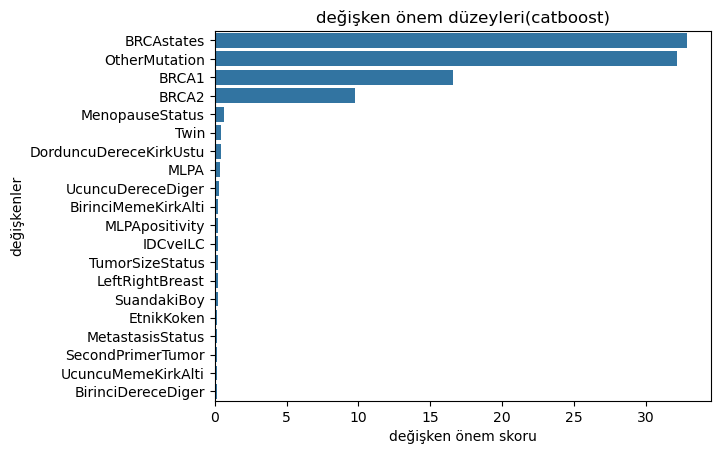

In [31]:
feature_imp = pd.Series(catb_tuned.feature_importances_, index=X_train.columns).sort_values(ascending=False).head(20)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel("değişken önem skoru")
plt.ylabel("değişkenler")
plt.title("değişken önem düzeyleri(catboost)")
plt.show()